In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x12e084160>,
 'week2': <src.game.Game at 0x12e094d30>,
 'week3': <src.game.Game at 0x12e0b2a90>,
 'week4': <src.game.Game at 0x10c86d898>,
 'week5': <src.game.Game at 0x10c8817f0>,
 'week6': <src.game.Game at 0x11ee14550>,
 'week7': <src.game.Game at 0x11ee1ddd8>,
 'week8': <src.game.Game at 0x11ee42550>,
 'week10': <src.game.Game at 0x11ee68358>,
 'week11': <src.game.Game at 0x11ee79898>,
 'week12': <src.game.Game at 0x11ee8add8>,
 'week13': <src.game.Game at 0x11eeae0b8>,
 'week14': <src.game.Game at 0x11eebf2b0>,
 'week15': <src.game.Game at 0x11f090f60>,
 'week16': <src.game.Game at 0x11f0a35f8>,
 'week17': <src.game.Game at 0x11f0c6550>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [35]:
play_number = 29

In [36]:
play = game.plays[play_number - 1]

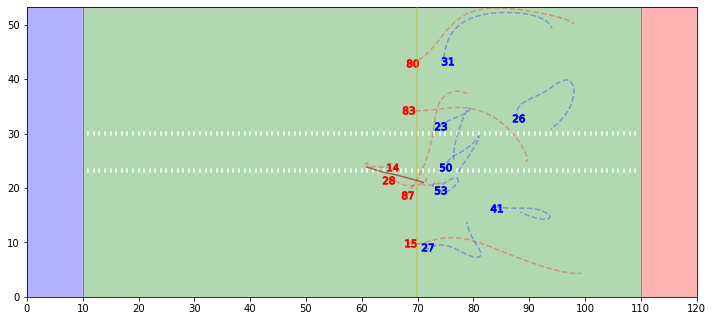

In [37]:
play.plot_play(markers='number')

In [38]:
frame = play.events['ball_snap']

In [39]:
#dbacks = play.return_players_by_position('CB')
dbacks = play.return_defensive_backs()

In [40]:
receivers = play.return_receivers()

In [41]:
for db in dbacks:
    dc = db.distance_from_center(frame)
    dl = db.distance_from_line(frame)
    print(f'{db.name} - {db.number} - {db.position} - Distance from Center: {dc:.1f} - Distance from Line: {dl:.1f}')

Quincy Wilson - 31 - CB - Distance from Center: 19.6 - Distance from Line: 4.5
Nate Hairston - 27 - CB - Distance from Center: -14.7 - Distance from Line: 1.7
Kenny Moore II - 23 - CB - Distance from Center: 7.4 - Distance from Line: 4.1
Clayton Geathers - 26 - FS - Distance from Center: 9.8 - Distance from Line: 17.9
Matthias Farley - 41 - SS - Distance from Center: -7.5 - Distance from Line: 14.1


In [42]:
for rc in receivers:
    dc = rc.distance_from_center(frame)
    dl = rc.distance_from_line(frame)
    print(f'{rc.name} - {rc.number} - {rc.position} - Distance from Center: {dc:.1f} - Distance from Line: {dl:.1f}')

Tyler Boyd - 83 - WR - Distance from Center: 10.3 - Distance from Line: -1.6
John Ross - 15 - WR - Distance from Center: -14.1 - Distance from Line: -1.2
Josh Malone - 80 - WR - Distance from Center: 19.0 - Distance from Line: -1.0
C.J. Uzomah - 87 - TE - Distance from Center: -5.2 - Distance from Line: -1.8
Joe Mixon - 28 - HB - Distance from Center: -2.4 - Distance from Line: -5.2


### Separate Defensive Backs by Top/Bottom

In [43]:
top_dbacks = []
bottom_dbacks = []
for db in dbacks:
    if db.distance_from_center(frame) > 0:
        top_dbacks.append(db)
    else:
        bottom_dbacks.append(db)

### Separate Recievers by Top/Bottom

In [26]:
uncovered_top_receivers = []
uncovered_bottom_receivers = []
for rc in receivers:
    if rc.distance_from_center(frame) > 0:
        uncovered_top_receivers.append(rc)
    else:
        uncovered_bottom_receivers.append(rc)

In [27]:
top_dbacks.sort(reverse=True, key=lambda player: player.distance_from_center(frame))
bottom_dbacks.sort(key=lambda player: player.distance_from_center(frame))

uncovered_top_receivers.sort(reverse=True, key=lambda player: player.distance_from_center(frame))
uncovered_bottom_receivers.sort(key=lambda player: player.distance_from_center(frame))

In [28]:
for db in top_dbacks:
    print(f'{db.name} ({db.position}-{db.number}) - Distance From Line: {db.distance_from_line(frame):.1f}')
    for rc in uncovered_top_receivers:
        dx, dy, r = db.distance_to_player(rc, frame)
        print(f'  Distance from {rc.name}: dx={dx:.1f}, dy={dy:.1f}, r={r:.1f}')

Kenny Moore II (CB-23) - Distance From Line: 2.7
  Distance from A.J. Green: dx=5.3, dy=0.1, r=5.3
  Distance from C.J. Uzomah: dx=4.3, dy=12.6, r=13.3
Matthias Farley (SS-41) - Distance From Line: 15.5
  Distance from A.J. Green: dx=18.1, dy=-10.4, r=20.8
  Distance from C.J. Uzomah: dx=17.1, dy=2.1, r=17.2


In [29]:
for db in bottom_dbacks:
    print(f'{db.name} ({db.position}-{db.number}) - Distance From Line: {db.distance_from_line(frame):.1f}')
    for rc in uncovered_bottom_receivers:
        dx, dy, r = db.distance_to_player(rc, frame)
        print(f'  Distance from {rc.name}: dx={dx:.1f}, dy={dy:.1f}, r={r:.1f}')

Nate Hairston (CB-27) - Distance From Line: 2.8
  Distance from Tyler Boyd: dx=4.2, dy=-0.3, r=4.2
  Distance from Tyler Kroft: dx=5.0, dy=-10.1, r=11.2
  Distance from Joe Mixon: dx=8.1, dy=-12.5, r=14.9
Clayton Geathers (FS-26) - Distance From Line: 13.4
  Distance from Tyler Boyd: dx=14.9, dy=6.4, r=16.2
  Distance from Tyler Kroft: dx=15.7, dy=-3.4, r=16.0
  Distance from Joe Mixon: dx=18.8, dy=-5.9, r=19.7


In [30]:
horizontal_cover_threshold = 2.0
db_distance_from_line_threshold = 7.5
rc_distance_from_line_threshold = 3.0

In [31]:
for db in top_dbacks:
    print(f'{db.name} ({db.position}-{db.number})')
    for rc in uncovered_top_receivers:
        dx, dy, r = db.distance_to_player(rc, frame)
        print(f'  Horizontal distance to {rc.name} = {dy:.1f}')
        lock_condition1 = abs(dy) < horizontal_cover_threshold
        lock_condition2 = db.distance_from_line(frame) < db_distance_from_line_threshold
        lock_condition3 = abs(rc.distance_from_line(frame)) < rc_distance_from_line_threshold
        if lock_condition1 and lock_condition2 and lock_condition3:
            print(f'    {db.name} ({db.position}-{db.number}) covering {rc.name} ({rc.position}-{rc.number})')
            db.lock(rc)
            uncovered_top_receivers.remove(rc)

Kenny Moore II (CB-23)
  Horizontal distance to A.J. Green = 0.1
    Kenny Moore II (CB-23) covering A.J. Green (WR-18)
Matthias Farley (SS-41)
  Horizontal distance to C.J. Uzomah = 2.1


In [32]:
for db in bottom_dbacks:
    print(f'{db.name} ({db.position}-{db.number})')
    for rc in uncovered_bottom_receivers:
        dx, dy, r = db.distance_to_player(rc, frame)
        print(f'  Horizontal distance to {rc.name} = {dy:.1f}')
        lock_condition1 = abs(dy) < horizontal_cover_threshold
        lock_condition2 = db.distance_from_line(frame) < db_distance_from_line_threshold
        lock_condition3 = abs(rc.distance_from_line(frame)) < rc_distance_from_line_threshold
        if lock_condition1 and lock_condition2 and lock_condition3:
            print(f'    {db.name} ({db.position}-{db.number}) covering {rc.name} ({rc.position}-{rc.number})')
            db.lock(rc)
            uncovered_bottom_receivers.remove(rc)

Nate Hairston (CB-27)
  Horizontal distance to Tyler Boyd = -0.3
    Nate Hairston (CB-27) covering Tyler Boyd (WR-83)
  Horizontal distance to Joe Mixon = -12.5
Clayton Geathers (FS-26)
  Horizontal distance to Tyler Kroft = -3.4
  Horizontal distance to Joe Mixon = -5.9


In [33]:
def plot_play_frame(self, index, scale=1, markers=None, show_locks=False, show=True, output=False, target_directory=''):
    if isinstance(index,str):
        index = self.events[index] - 1

    fig,ax = self.build_field(scale=scale)

    ax.axvline(self.line_of_scrimmage,color='y',alpha=.5,zorder=3)

    for player in self.players['offense'].values():
        marker, s = self.set_player_marker(player, markers, scale)

        pos = player.tracking_data.loc[index]
        ax.scatter(pos['x'],pos['y'],color='r',marker=marker,zorder=3,s=s)

    for player in self.players['defense'].values():
        marker, s = self.set_player_marker(player, markers, scale)

        pos = player.tracking_data.loc[index]
        ax.scatter(pos['x'],pos['y'],color='b',marker=marker,zorder=3,s=s)

    ax.scatter(self.fb_tracking['x'].values[index],
               self.fb_tracking['y'].values[index],
               color='brown',marker='d',zorder=3)
    
    if show_locks:
        for player in self.players['defense'].values():
            player.draw_lock(ax,index)

    title = f'Play Frame - {index+1}'
    ax.set_title(title,fontsize=18)

    play_events = self.fb_tracking['event'].values
    _event = play_events[index]
    if play_events[index] != 'None':
        ax.set_xlabel(f'Event: {_event.replace("_"," ").title()}',fontsize=16)

    plt.show()

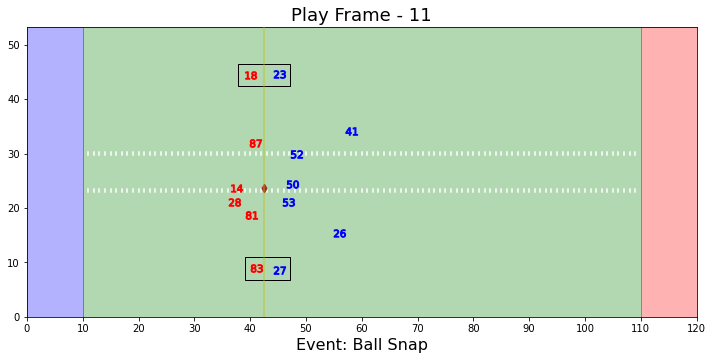

In [34]:
plot_play_frame(play, index='ball_snap',show_locks=True,markers='number')